In [47]:
# !pip install pdpbox
# !pip install xgboost

In [48]:

# 필요한 라이브러리 임포트
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams ## 차트의 크기를 조절하기 위한 라이브러리

from scipy.stats import ttest_ind
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, roc_curve
from sklearn.model_selection import train_test_split

import graphviz
from sklearn.tree import export_graphviz, DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

import shap 
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier
from xgboost import plot_tree

from pycaret.classification import *
from sklearn.preprocessing import *

import ssl 
ssl._create_default_https_context = ssl._create_unverified_context

from pdpbox import info_plots

In [49]:

# 데이터 파일 경로
file_path = r'C:\Users\USER\projects_data\week1_data.csv'

# 데이터 불러오기
data = pd.read_csv(file_path)

# 데이터 확인
print(data.head())

         X1        X2        X3        X4        X5        X6        X7  \
0  0.202296  0.003560  0.411261  0.015348  0.693147  0.036360  0.343512   
1  0.006836  0.007688  0.597304  0.015348  0.686838  0.067407  0.347869   
2  0.609621  0.001461  0.466186  0.015348  0.693090  0.018944  0.345032   
3  0.074007  0.003072  0.535876  0.015348  0.693147  0.031475  0.347502   
4  0.198356  0.007020  0.416238  0.015348  0.686838  0.061888  0.347441   

         X8        X9       X10       X11       X12       X13       X14  \
0  0.028087  0.681974  0.295769  0.003053  0.682731  0.249262  0.681974   
1  0.028640  0.497403  0.297943  0.005816  0.680891  0.249262  0.497403   
2  0.024502  0.647685  0.298255  0.001475  0.685525  0.249262  0.647685   
3  0.025393  0.587787  0.296057  0.002462  0.677980  0.249262  0.575364   
4  0.028450  0.537143  0.298167  0.005314  0.673286  0.249262  0.537143   

        X15       X16       X17       X18       X19       X20  Y  
0  0.016330  0.242926  0.557461

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527000 entries, 0 to 526999
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      527000 non-null  float64
 1   X2      527000 non-null  float64
 2   X3      527000 non-null  float64
 3   X4      527000 non-null  float64
 4   X5      527000 non-null  float64
 5   X6      527000 non-null  float64
 6   X7      527000 non-null  float64
 7   X8      527000 non-null  float64
 8   X9      527000 non-null  float64
 9   X10     527000 non-null  float64
 10  X11     527000 non-null  float64
 11  X12     527000 non-null  float64
 12  X13     527000 non-null  float64
 13  X14     527000 non-null  float64
 14  X15     527000 non-null  float64
 15  X16     527000 non-null  float64
 16  X17     527000 non-null  float64
 17  X18     527000 non-null  float64
 18  X19     527000 non-null  float64
 19  X20     527000 non-null  float64
 20  Y       527000 non-null  int64  
dtypes: float64

In [51]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
count,527000.000000,527000.000000,527000.000000,5.270000e+05,527000.000000,527000.000000,527000.000000,527000.000000,527000.000000,527000.000000,527000.000000,527000.000000,5.270000e+05,527000.000000,527000.000000,527000.000000,527000.000000,527000.000000,527000.000000,527000.000000,527000.000000
mean,0.375129,0.003963,0.455679,1.534800e-02,0.638446,0.037449,0.348374,0.025152,0.602939,0.299989,0.003356,0.680077,2.492619e-01,0.601662,0.603826,0.247010,0.559367,0.025152,0.680077,0.037449,0.108159
std,0.200043,0.004316,0.105150,2.081670e-17,0.139334,0.016994,0.028971,0.003820,0.071272,0.033502,0.004126,0.005244,1.387780e-16,0.065753,0.165551,0.030353,0.013077,0.003820,0.005244,0.016994,0.310582
min,0.000000,0.000000,0.000000,1.534800e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.492619e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.204692,0.002366,0.415990,1.534800e-02,0.688810,0.026023,0.344457,0.024164,0.562785,0.295929,0.002133,0.676136,2.492619e-01,0.562785,0.623615,0.243377,0.556788,0.024164,0.676136,0.026023,0.000000
50%,0.399744,0.003523,0.435739,1.534800e-02,0.693147,0.034280,0.345721,0.025805,0.624154,0.296921,0.003066,0.680586,2.492619e-01,0.612178,0.645785,0.244290,0.557708,0.025805,0.680586,0.034280,0.000000
75%,0.545196,0.005094,0.530429,1.534800e-02,0.693147,0.048085,0.346949,0.028069,0.659246,0.297723,0.004237,0.684354,2.492619e-01,0.647685,0.668555,0.245254,0.559589,0.028069,0.684354,0.048085,0.000000
max,0.693147,0.693147,0.693147,1.534800e-02,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,2.492619e-01,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,1.000000


In [52]:
data.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
Y      0
dtype: int64

In [53]:
print(data['X4'].unique())
print(data['X13'].unique())


[0.015348]
[0.2492619]


In [54]:
# 단일 값으로 X4, X13 두 변수 제거
data = data.drop(columns=['X4', 'X13'])
data.head()

,X1,X2,X3,X5,X6,X7,X8,X9,X10,X11,X12,X14,X15,X16,X17,X18,X19,X20,Y
0,0.202296,0.003560,0.411261,0.693147,0.036360,0.343512,0.028087,0.681974,0.295769,0.003053,0.682731,0.681974,0.016330,0.242926,0.557461,0.028087,0.682731,0.036360,0
1,0.006836,0.007688,0.597304,0.686838,0.067407,0.347869,0.028640,0.497403,0.297943,0.005816,0.680891,0.497403,0.670040,0.245876,0.561336,0.028640,0.680891,0.067407,0
2,0.609621,0.001461,0.466186,0.693090,0.018944,0.345032,0.024502,0.647685,0.298255,0.001475,0.685525,0.647685,0.648486,0.243602,0.559431,0.024502,0.685525,0.018944,0
3,0.074007,0.003072,0.535876,0.693147,0.031475,0.347502,0.025393,0.587787,0.296057,0.002462,0.677980,0.575364,0.632563,0.246078,0.556761,0.025393,0.677980,0.031475,0
4,0.198356,0.007020,0.416238,0.686838,0.061888,0.347441,0.028450,0.537143,0.298167,0.005314,0.673286,0.537143,0.671124,0.245505,0.561695,0.028450,0.673286,0.061888,0


### 상관관계

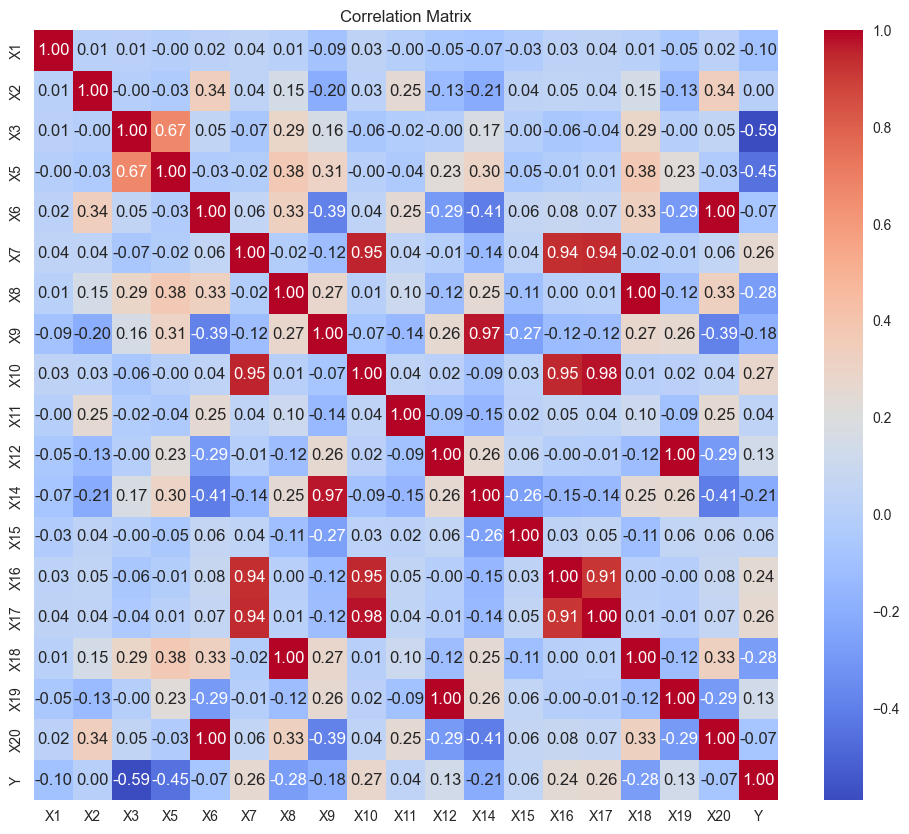

Y      1.000000
X10    0.274853
X7     0.256614
X17    0.255089
X16    0.242476
X19    0.132465
X12    0.132465
X15    0.057156
X11    0.037709
X2     0.002553
X6    -0.072784
X20   -0.072784
X1    -0.096399
X9    -0.183860
X14   -0.207272
X8    -0.276787
X18   -0.276787
X5    -0.447319
X3    -0.590159
Name: Y, dtype: float64

In [55]:
# 상관계수 행렬 계산
correlation_matrix = data.corr()

# Y와의 상관관계 확인
correlation_with_y = correlation_matrix["Y"].sort_values(ascending=False)

# 상관관계 행렬 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Y와 다른 변수들의 상관관계 출력
correlation_with_y

## 상관계수가 1인 변수 확인 - 시각화

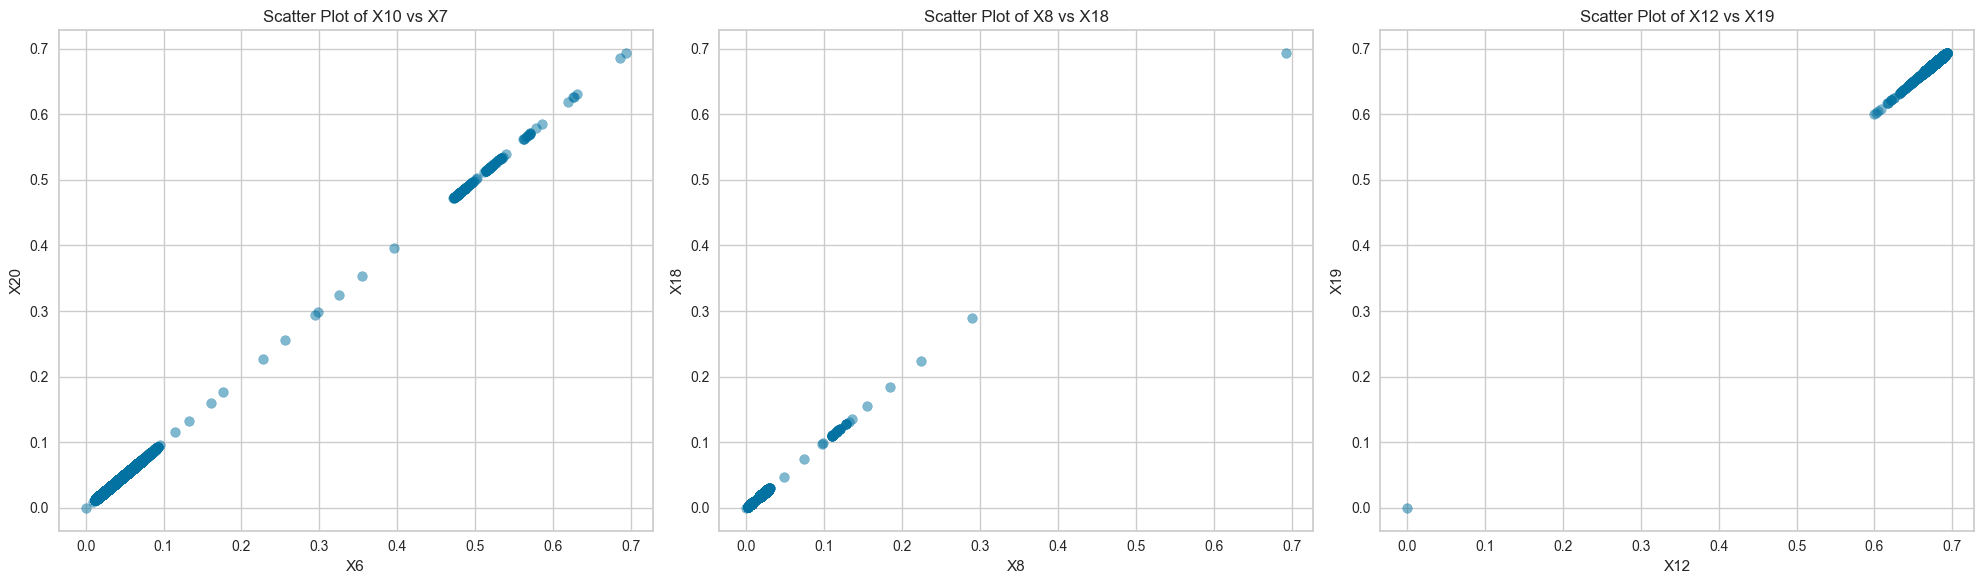

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

axes[0].scatter(data['X6'], data['X20'], alpha=0.5)
axes[0].set_title('Scatter Plot of X10 vs X7')
axes[0].set_xlabel('X6')
axes[0].set_ylabel('X20')
axes[0].grid(True)

axes[1].scatter(data['X8'], data['X18'], alpha=0.5)
axes[1].set_title('Scatter Plot of X8 vs X18')
axes[1].set_xlabel('X8')
axes[1].set_ylabel('X18')
axes[1].grid(True)

axes[2].scatter(data['X12'], data['X19'], alpha=0.5)
axes[2].set_title('Scatter Plot of X12 vs X19')
axes[2].set_xlabel('X12')
axes[2].set_ylabel('X19')
axes[2].grid(True)

plt.tight_layout()
plt.show()


In [57]:
# 단일 값으로 X4, X13 두 변수 제거
data = data.drop(columns=['X18', 'X19', 'X20'])
data.head()

,X1,X2,X3,X5,X6,X7,X8,X9,X10,X11,X12,X14,X15,X16,X17,Y
0,0.202296,0.003560,0.411261,0.693147,0.036360,0.343512,0.028087,0.681974,0.295769,0.003053,0.682731,0.681974,0.016330,0.242926,0.557461,0
1,0.006836,0.007688,0.597304,0.686838,0.067407,0.347869,0.028640,0.497403,0.297943,0.005816,0.680891,0.497403,0.670040,0.245876,0.561336,0
2,0.609621,0.001461,0.466186,0.693090,0.018944,0.345032,0.024502,0.647685,0.298255,0.001475,0.685525,0.647685,0.648486,0.243602,0.559431,0
3,0.074007,0.003072,0.535876,0.693147,0.031475,0.347502,0.025393,0.587787,0.296057,0.002462,0.677980,0.575364,0.632563,0.246078,0.556761,0
4,0.198356,0.007020,0.416238,0.686838,0.061888,0.347441,0.028450,0.537143,0.298167,0.005314,0.673286,0.537143,0.671124,0.245505,0.561695,0


## EDA: T-test

In [58]:
# 사용할 피처들
features = ['X1', 'X2', 'X3', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X14', 'X15', 'X16', 'X17']

# 각 피처에 대해 t-test를 수행
t_test_results = {}
for feature in features:
    group1 = data[data['Y'] == 0][feature]
    group2 = data[data['Y'] == 1][feature]
    t_stat, p_val = ttest_ind(group1, group2)
    t_test_results[feature] = (t_stat, p_val)

# t-test 결과 출력
for feature, (t_stat, p_val) in t_test_results.items():
    print(f"Feature: {feature}, t-statistic: {t_stat:.5f}, p-value: {p_val:.5f}")

Feature: X1, t-statistic: 70.30808, p-value: 0.00000
Feature: X2, t-statistic: -1.85315, p-value: 0.06386
Feature: X3, t-statistic: 530.69634, p-value: 0.00000
Feature: X5, t-statistic: 363.07998, p-value: 0.00000
Feature: X6, t-statistic: 52.97766, p-value: 0.00000
Feature: X7, t-statistic: -192.74184, p-value: 0.00000
Feature: X8, t-statistic: 209.10197, p-value: 0.00000
Feature: X9, t-statistic: 135.78716, p-value: 0.00000
Feature: X10, t-statistic: -207.52071, p-value: 0.00000
Feature: X11, t-statistic: -27.39440, p-value: 0.00000
Feature: X12, t-statistic: -97.01708, p-value: 0.00000
Feature: X14, t-statistic: 153.80845, p-value: 0.00000
Feature: X15, t-statistic: -41.56031, p-value: 0.00000
Feature: X16, t-statistic: -181.43893, p-value: 0.00000
Feature: X17, t-statistic: -191.51699, p-value: 0.00000


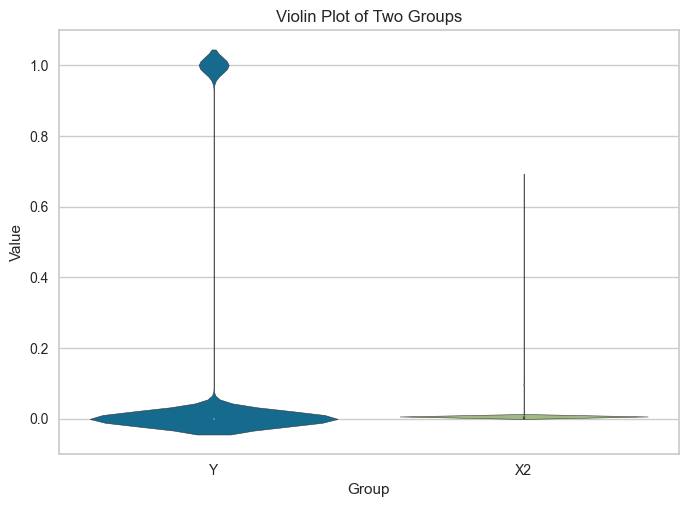

In [59]:
# 두 그룹의 데이터 예시
group1_data = data['Y']
group2_data = data['X2']
# 바이올린 그래프 그리기
sns.violinplot(data=[group1_data, group2_data])
plt.xlabel('Group')
plt.ylabel('Value')
plt.title('Violin Plot of Two Groups')
plt.show()

## AutoML을 통한 모델 선정

In [60]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the number of samples in each set
print("Number of samples in X_train:", len(X_train))
print("Number of samples in X_test:", len(X_test))
print("Number of samples in y_train:", len(y_train))
print("Number of samples in y_test:", len(y_test))

# Print the counts of 0s and 1s in the training and testing sets
print("\nCounts in y_train:", y_train.value_counts())
print("\nCounts in y_test:", y_test.value_counts())

Number of samples in X_train: 421600
Number of samples in X_test: 105400
Number of samples in y_train: 421600
Number of samples in y_test: 105400

Counts in y_train: 0    376117
1     45483
Name: Y, dtype: int64

Counts in y_test: 0    93883
1    11517
Name: Y, dtype: int64


In [61]:
# import imblearn
setup_clf = setup(data, target = 'Y',
                  train_size = 0.7,
                  numeric_features = X.columns.tolist(),
                  # encoding_method = None,
                  normalize = True,
                  normalize_method = 'zscore',
                  # remove_outliers = True,
                  # feature_selection = True,
                  # feature_selection_method = 'classic',
                  # fix_imbalance = True,
                  # fix_imbalance_method = 'SMOTE',
                  n_jobs = - 1,
                  session_id = 42)

,Description,Value
0,Session id,42
1,Target,Y
2,Target type,Binary
3,Original data shape,"(527000, 16)"
4,Transformed data shape,"(527000, 16)"
5,Transformed train set shape,"(368900, 16)"
6,Transformed test set shape,"(158100, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [62]:
# AutoML
# !pip install pycaret
from pycaret.classification import *
setup_clf = setup(data, target = 'Y', session_id = 0)
# 표준화 시켜서 돌려보기
from pycaret.classification import *
from sklearn.preprocessing import *
# import imblearn
setup_clf = setup(data, target = 'Y',
                  train_size = 0.7,
                  numeric_features = X.columns[:20].tolist(),
                  # encoding_method = None,
                  normalize = True,
                  normalize_method = 'zscore',
                  n_jobs = -1,
                  session_id = 0)
models()
best = compare_models()

,Description,Value
0,Session id,0
1,Target,Y
2,Target type,Binary
3,Original data shape,"(527000, 16)"
4,Transformed data shape,"(527000, 16)"
5,Transformed train set shape,"(368900, 16)"
6,Transformed test set shape,"(158100, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,0
1,Target,Y
2,Target type,Binary
3,Original data shape,"(527000, 16)"
4,Transformed data shape,"(527000, 16)"
5,Transformed train set shape,"(368900, 16)"
6,Transformed test set shape,"(158100, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9997,0.9999,0.9973,0.9999,0.9986,0.9984,0.9984,16.5950
et,Extra Trees Classifier,0.9997,0.9999,0.9976,1.0000,0.9988,0.9986,0.9987,3.9830
xgboost,Extreme Gradient Boosting,0.9997,0.9999,0.9976,0.9999,0.9988,0.9986,0.9986,15.3590
knn,K Neighbors Classifier,0.9994,0.9986,0.9949,0.9998,0.9973,0.9970,0.9970,2.5170
dt,Decision Tree Classifier,0.9994,0.9982,0.9968,0.9975,0.9972,0.9968,0.9968,2.0420
gbc,Gradient Boosting Classifier,0.9993,0.9992,0.9937,0.9995,0.9966,0.9962,0.9962,23.3820
lightgbm,Light Gradient Boosting Machine,0.9993,0.9992,0.9968,0.9964,0.9966,0.9962,0.9962,0.9110
ada,Ada Boost Classifier,0.9989,0.9995,0.9912,0.9985,0.9948,0.9942,0.9942,4.3940
lr,Logistic Regression,0.9982,0.9982,0.9854,0.9977,0.9915,0.9905,0.9905,0.7960
svm,SVM - Linear Kernel,0.9978,0.0000,0.9829,0.9968,0.9898,0.9885,0.9886,0.1790


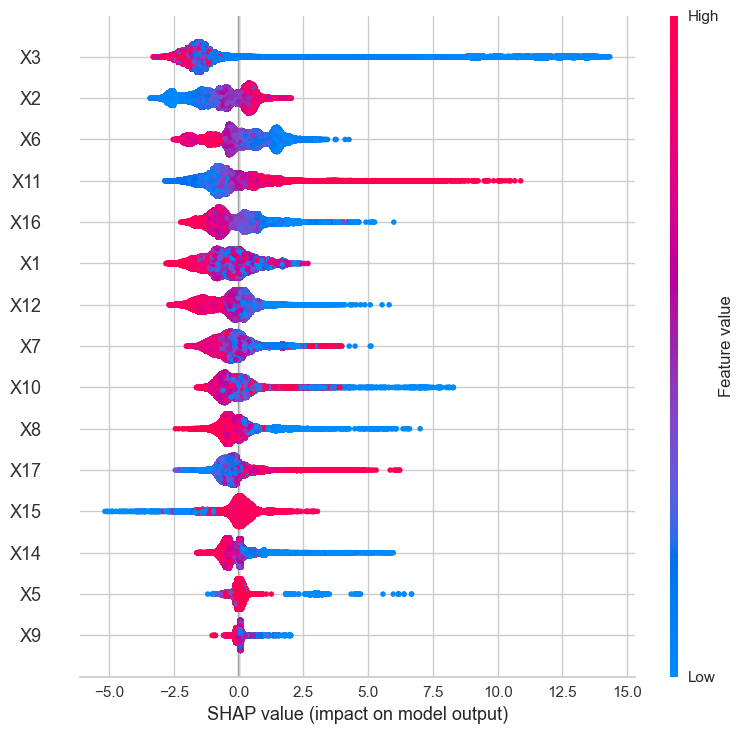

In [63]:
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

shap.initjs()
explainer = shap.TreeExplainer(model) ## 모델을 shap에 입력
shap_values = explainer.shap_values(X_train) ## shap value 계산

## summary_plot은 모든 변수의 섀플리 값을 보여준다.
shap.summary_plot(shap_values, X_train)

### 의사결정나무

In [64]:
# 테스트 데이터로 예측하기
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# 정확도 출력하기
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))



Accuracy: 99.97%


In [65]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_test,y_test_pred))
print(metrics.confusion_matrix(y_test,y_test_pred))

# classification_report를 소수점 5자리까지 출력하도록 합니다.
report = classification_report(y_test, y_test_pred, digits=5)
print(report)


0.9999976280834915
0.9997248576850095
[[93881     2]
 [   27 11490]]
              precision    recall  f1-score   support

           0    0.99971   0.99998   0.99985     93883
           1    0.99983   0.99766   0.99874     11517

    accuracy                        0.99972    105400
   macro avg    0.99977   0.99882   0.99929    105400
weighted avg    0.99972   0.99972   0.99972    105400



In [66]:
rcParams['figure.figsize'] = 200, 100 ## 차트의 크기를 조절

## 트리를 그린다.
plot_tree(model)
plt.show() ## 차트를 보여준다.

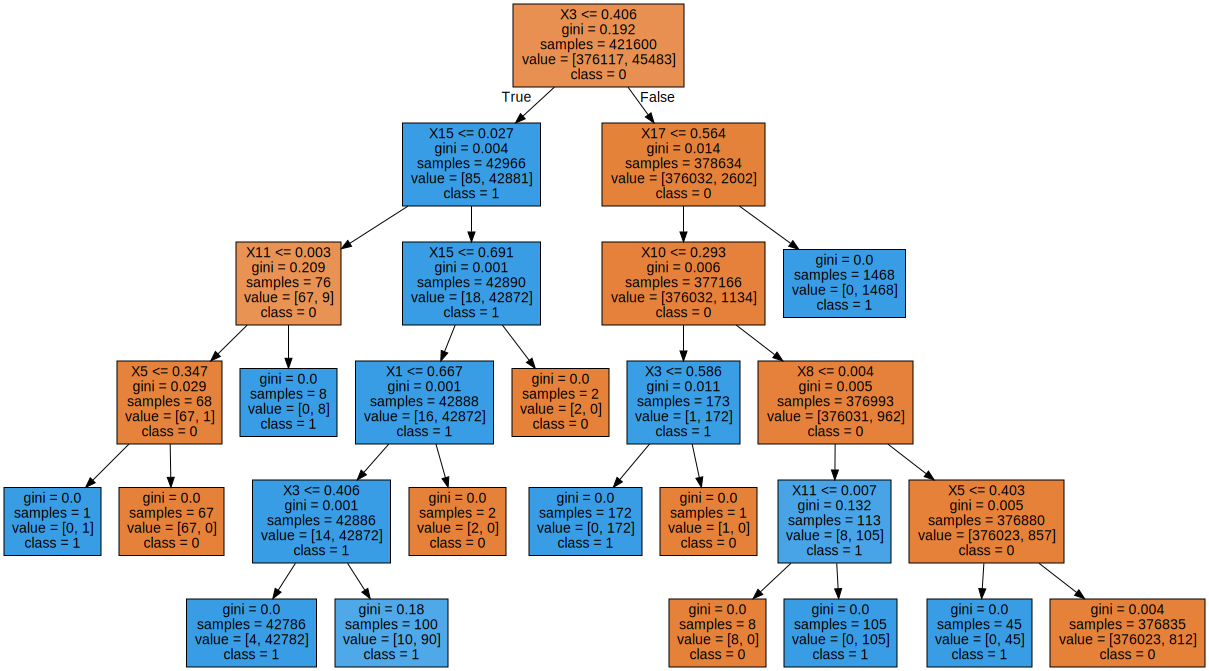

In [67]:
dt_clf = DecisionTreeClassifier(random_state=42, 
                                max_depth=5,
                                )

dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, out_file="tree.dot", 
                class_names=['0','1'],
                feature_names = X_train.columns, 
                impurity=True, 
                filled=True)

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [68]:
pima_feature = X_train.columns
pima_target = 'Outcome'

target_plot = info_plots.TargetPlot(
    df=data,
    feature='X3',
    feature_name='X3',
    target='Y',
)

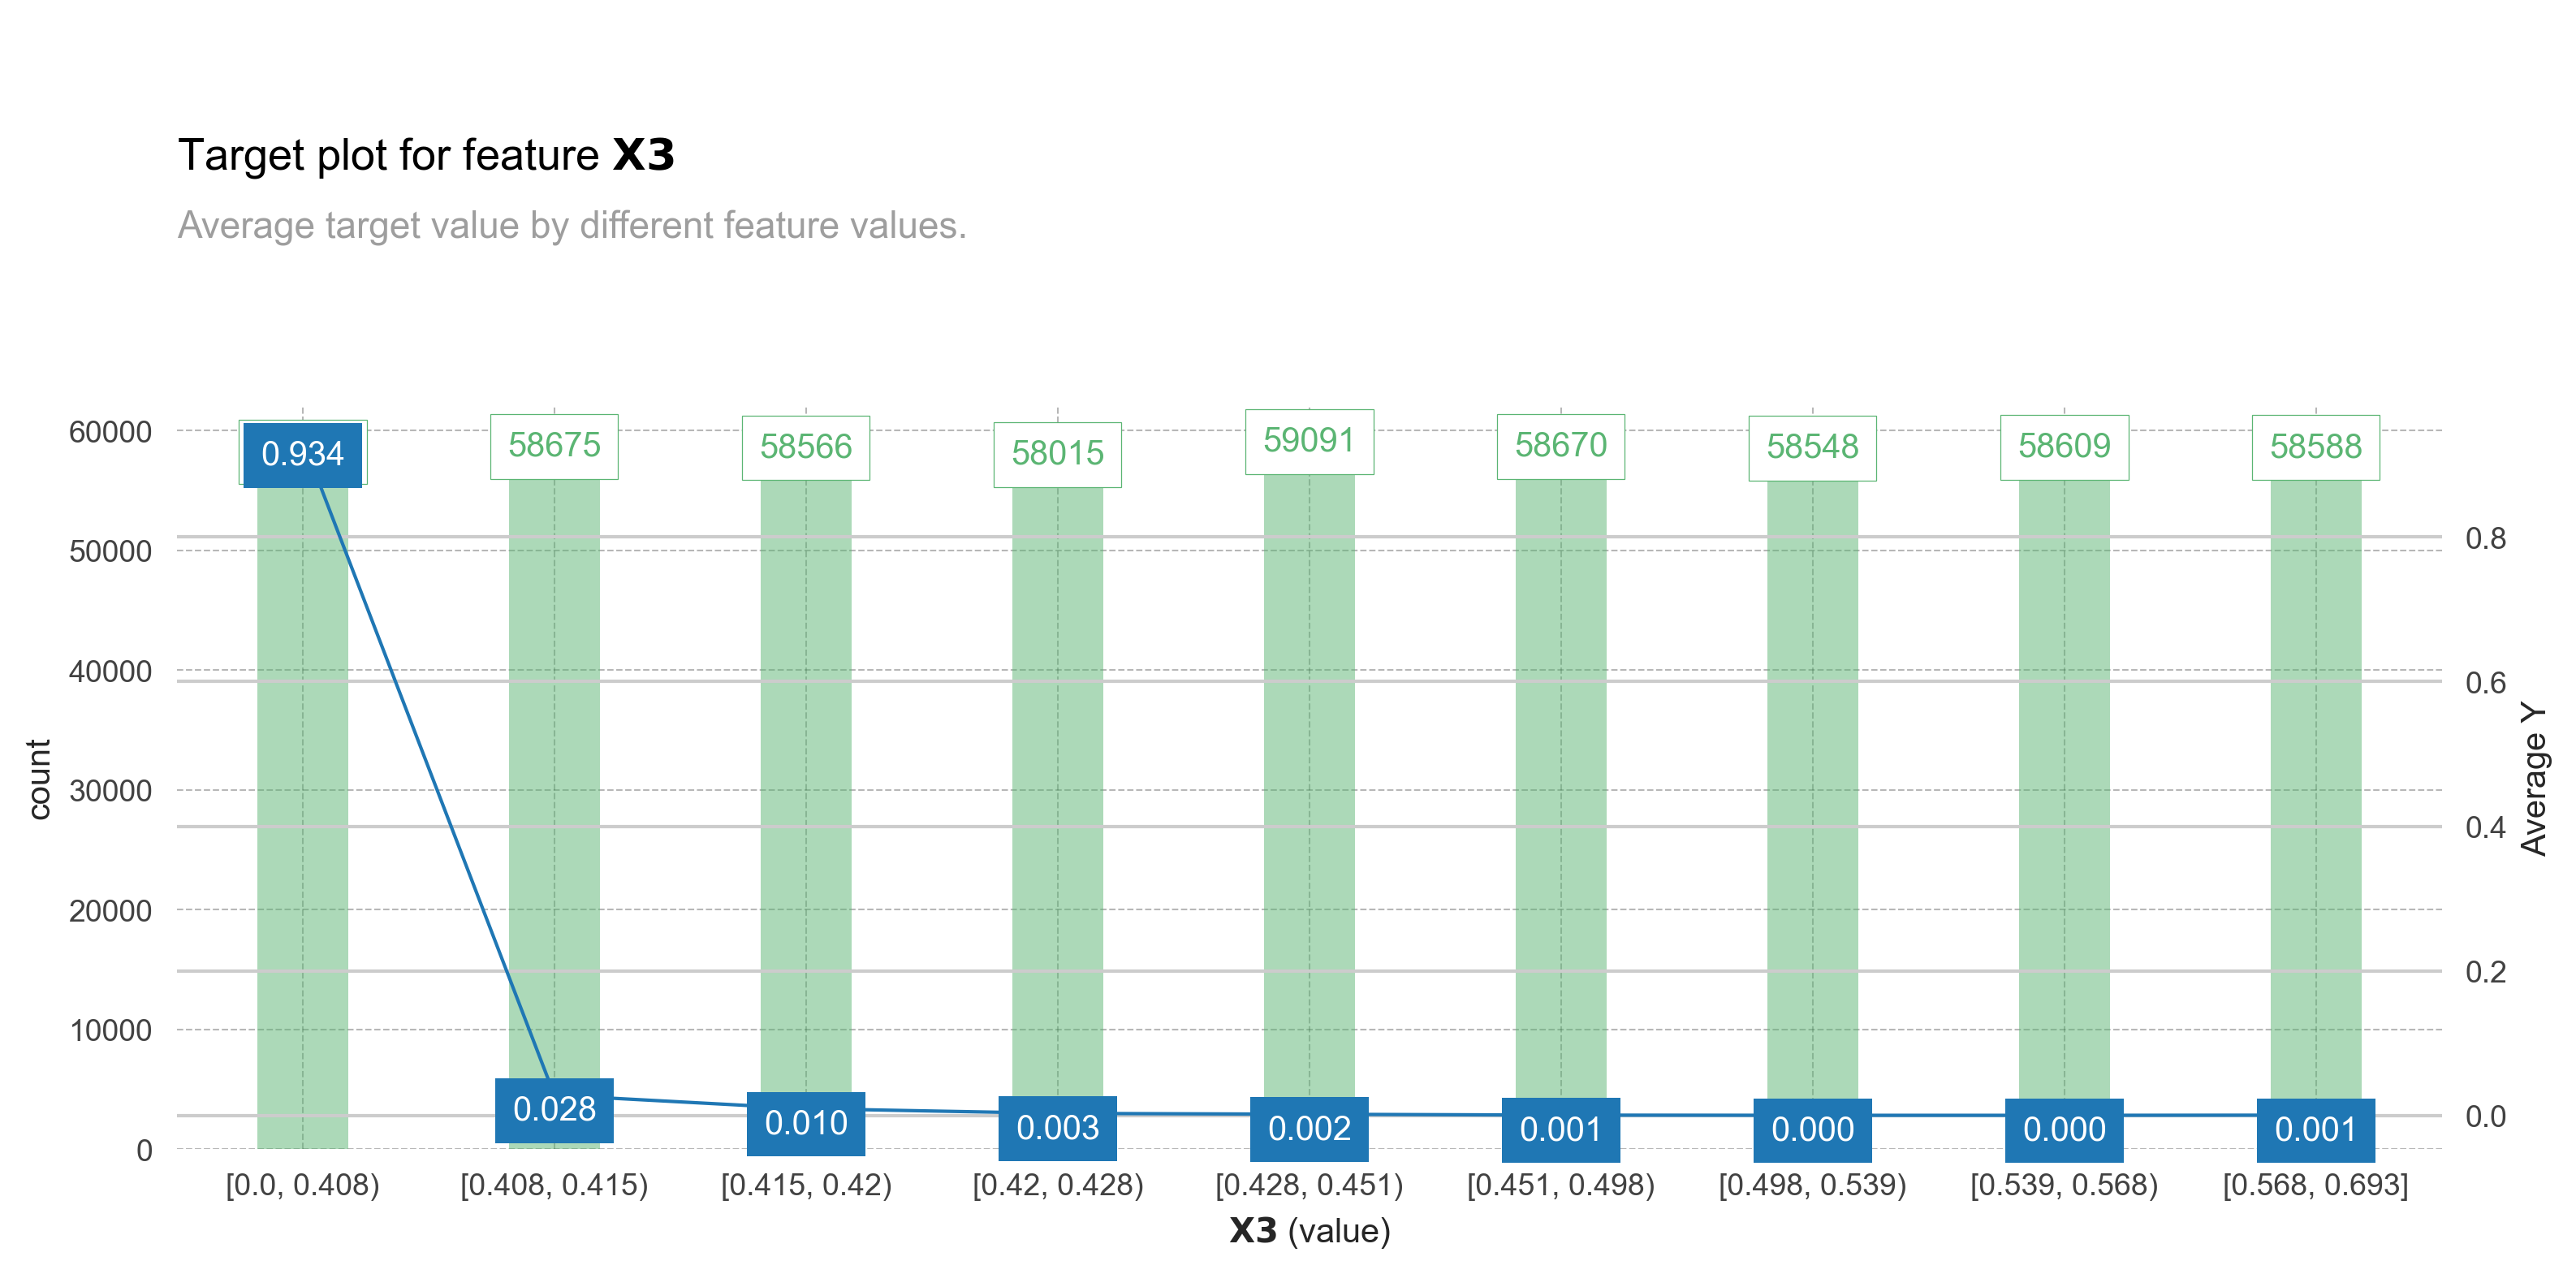

In [69]:
fig, axes, summary_df = target_plot.plot(
    figsize=(12, 6),
    plot_params=None,
    engine='matplotlib',
)

## X3과 y 사이의 관계를 알아보자

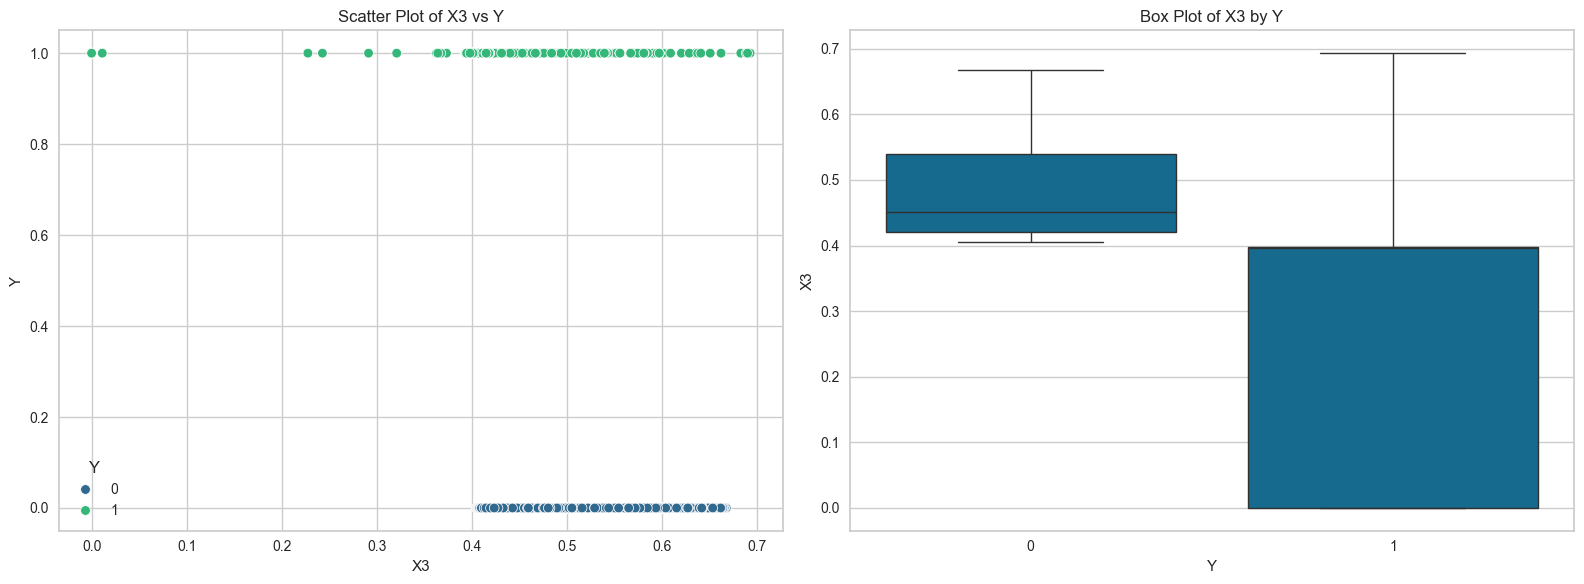

In [70]:
target_X = 'X3'

# 산점도와 상자 그림
plt.figure(figsize=(16, 6))

# 산점도
plt.subplot(1, 2, 1)
sns.scatterplot(x=data[target_X], y=data['Y'], hue=data['Y'], palette='viridis')
plt.title('Scatter Plot of ' + target_X + ' vs Y')
plt.xlabel(target_X)
plt.ylabel('Y')

# 상자 그림
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Y'], y=data[target_X])
plt.title('Box Plot of ' + target_X + ' by Y')
plt.xlabel('Y')
plt.ylabel(target_X)

plt.tight_layout()
plt.show()

In [71]:
# X3 컬럼의 최대값 구하기
max_x3 = X['X3'].max()

# X3에서 불량만 있는 범위 구하기
max_defective_x3 = X[X['X3'] <= 0.4]['X3'].max()

print("X3에서 불량만 나오는 최대 수치:", max_defective_x3)

X3에서 불량만 나오는 최대 수치: 0.39980364


In [72]:
# X3에서 0.4 사이에 불량이 있는지 확인
defective_between_0_4 = data[(data['X3'] > 0.4) & (data['X3'] < max_defective_x3)]

if defective_between_0_4.empty:
    print("0.4와 최대 불량 수치 사이에는 불량이 없다.")
else:
    print("0.4와 최대 불량 수치 사이에 불량이 있다.")

0.4와 최대 불량 수치 사이에는 불량이 없다.


### 2. 0.4 이상의 데이터에서 X와 Y 사이의 비율 점검

In [73]:
# X3 값이 0.4 이상인 데이터 필터링
filtered_data_04_above = data[data['X3'] > 0.4]

# Y의 분포 확인
y_distribution_above = filtered_data_04_above['Y'].value_counts(normalize=True)

print("Y distribution in data where X3 > 0.4:")
print(y_distribution_above)

# Y의 개수 확인
y_counts_above = filtered_data_04_above['Y'].value_counts()

print("Y counts in data where X3 > 0.4:")
print(y_counts_above)


Y distribution in data where X3 > 0.4:
0    0.982222
1    0.017778
Name: Y, dtype: float64
Y counts in data where X3 > 0.4:
0    470000
1      8507
Name: Y, dtype: int64


### 3. 0.4 이하의 데이터 중 양품과 불량품의 비율

In [74]:
# X3 값이 0.4 이하인 데이터 필터링
filtered_data_04_below = data[data['X3'] <= 0.4]

# Y의 분포 확인
y_distribution_below = filtered_data_04_below['Y'].value_counts(normalize=True)

print("Y distribution in data where X3 <= 0.4:")
print(y_distribution_below)

# Y의 개수 확인
y_counts_below = filtered_data_04_below['Y'].value_counts()

print("Y counts in data where X3 <= 0.4:")
print(y_counts_below)

Y distribution in data where X3 <= 0.4:
1    1.0
Name: Y, dtype: float64
Y counts in data where X3 <= 0.4:
1    48493
Name: Y, dtype: int64


### 전체 데이터 중 0.4 이하인 비율

In [75]:
# 전체 불량품(Y=1) 중에서 X3가 0.4 이하인 비율 계산
total_y1_count = data[data['Y'] == 1].shape[0]
below_04_y1_count = filtered_data_04_below[filtered_data_04_below['Y'] == 1].shape[0]
below_04_y1_ratio = (below_04_y1_count / total_y1_count) * 100

print(f"Total Y=1 count: {total_y1_count}")
print(f"Y=1 count with X3 <= 0.4: {below_04_y1_count}")
print(f"Percentage of Y=1 with X3 <= 0.4: {below_04_y1_ratio:.2f}%")

Total Y=1 count: 57000
Y=1 count with X3 <= 0.4: 48493
Percentage of Y=1 with X3 <= 0.4: 85.08%


X3에서 0.4이하의 데이터는 모두 불량품이며, 이는 전제 불량품 중 85.08%를 설명한다. 
-> 0.4 이하를 만들어내는 원인을 고려, 개선하면 불량품 감소에 큰 영향을 끼칠 수 있지 않을까? or 다른거랑 같이?

In [76]:
shap.initjs()
explainer = shap.TreeExplainer(model) ## 모델을 shap에 입력
shap_values = explainer.shap_values(X_train) ## shap value 계산

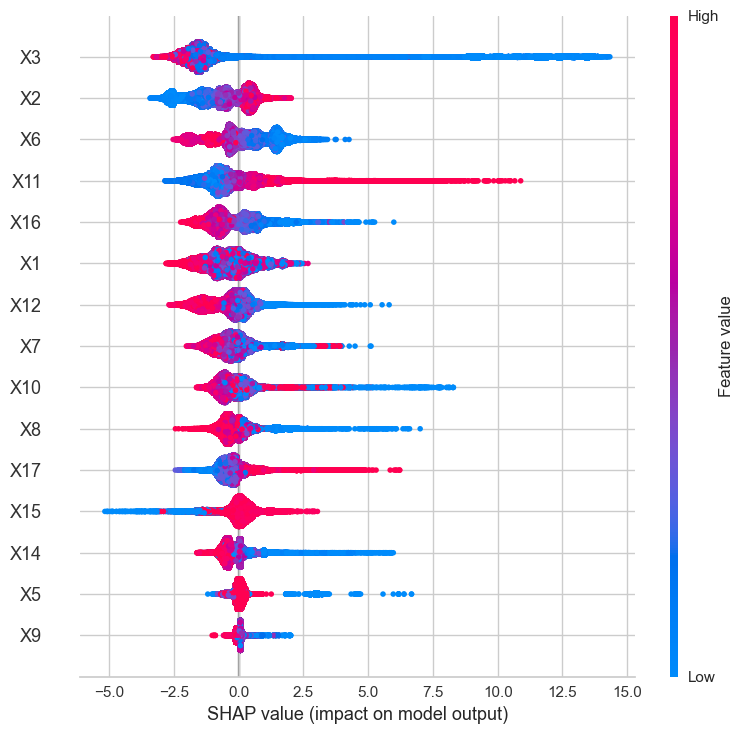

In [77]:
## summary_plot은 모든 변수의 섀플리 값을 보여준다.
shap.summary_plot(shap_values, X_train)

In [78]:
depth_4_model = XGBClassifier(max_depth=4)
depth_4_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', ...)

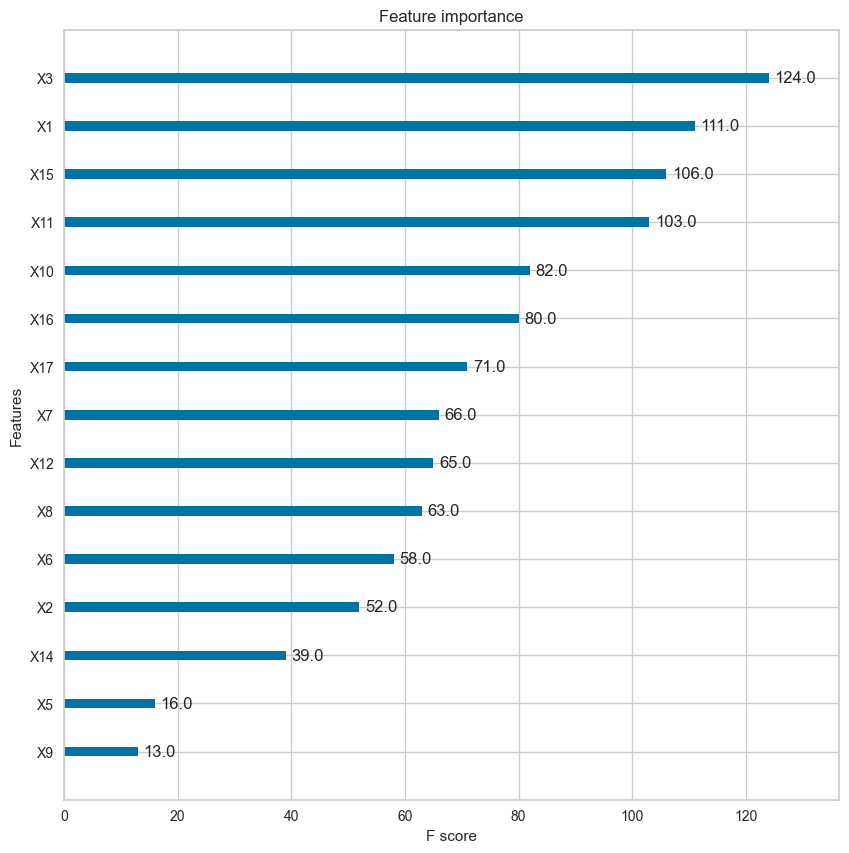

In [79]:
# 피처 중요도 시각화 : 상위 5개(X3, X15, X11, X1, X10)
rcParams['figure.figsize'] = 10, 10

plot_importance(depth_4_model)
plt.show() 

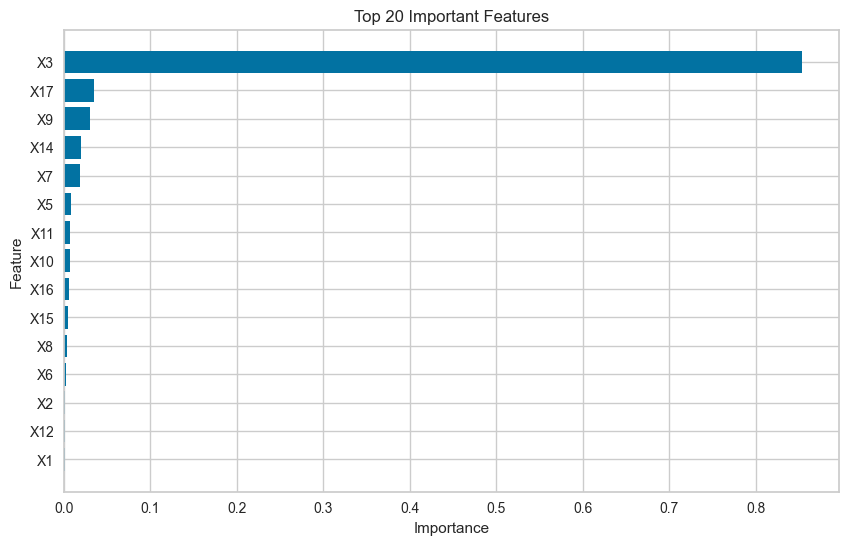

In [80]:
# 특성 중요도 추출
feature_importances = model.feature_importances_

# 특성 중요도를 DataFrame으로 변환
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# 중요도에 따라 데이터프레임 정렬
features_df = features_df.sort_values(by='Importance', ascending=False)

# 상위 N개의 중요한 특성만 선택
top_n = 20
top_features = features_df.head(top_n)

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.gca().invert_yaxis()  # 중요도가 높은 특성을 위로
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Important Features')
plt.show()

## lgbm 모델

In [81]:
import lightgbm as lgb

model = lgb.LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

preds = model.predict(X_test)
accuracy = accuracy_score(y_test, preds)

print("Accuracy:", round(accuracy, 9))

[LightGBM] [Info] Number of positive: 45483, number of negative: 376117
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009935 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3155
[LightGBM] [Info] Number of data points in the train set: 421600, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.107882 -> initscore=-2.112562
[LightGBM] [Info] Start training from score -2.112562
Accuracy: 0.999459203


In [82]:
print("Accuracy:", round(accuracy, 9))

Accuracy: 0.999459203


In [83]:

y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_test,y_test_pred))
print(metrics.confusion_matrix(y_test,y_test_pred))

0.9999905123339659
0.9994592030360532
[[93855    28]
 [   29 11488]]


In [84]:
# classification_report를 소수점 5자리까지 출력하도록 합니다.
report = classification_report(y_test, y_test_pred, digits=5)
print(report)

              precision    recall  f1-score   support

           0    0.99969   0.99970   0.99970     93883
           1    0.99757   0.99748   0.99753     11517

    accuracy                        0.99946    105400
   macro avg    0.99863   0.99859   0.99861    105400
weighted avg    0.99946   0.99946   0.99946    105400



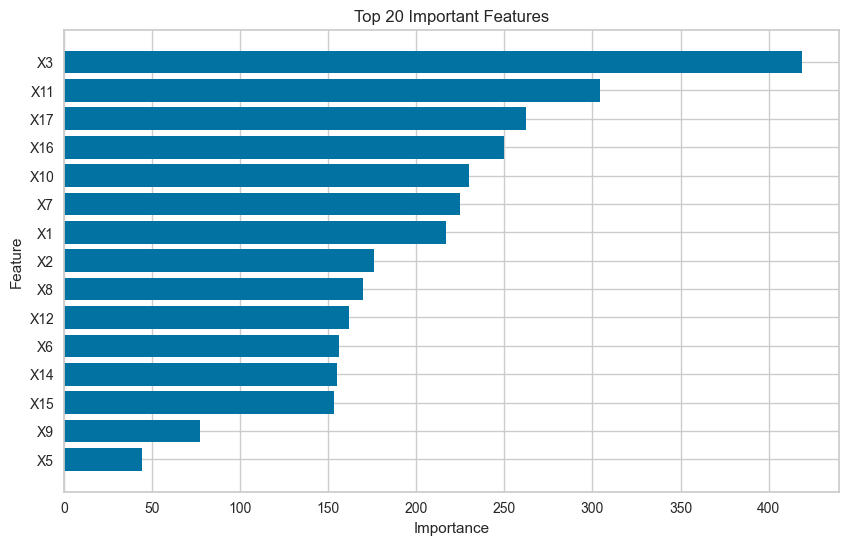

In [85]:
# # 특성 중요도 추출
feature_importances = model.feature_importances_

# # 특성 중요도를 DataFrame으로 변환
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# # 중요도에 따라 데이터프레임 정렬
features_df = features_df.sort_values(by='Importance', ascending=False)


# 상위 N개의 중요한 특성만 선택
top_n = 20
top_features = features_df.head(top_n)

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.gca().invert_yaxis()  # 중요도가 높은 특성을 위로
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Important Features')
plt.show()

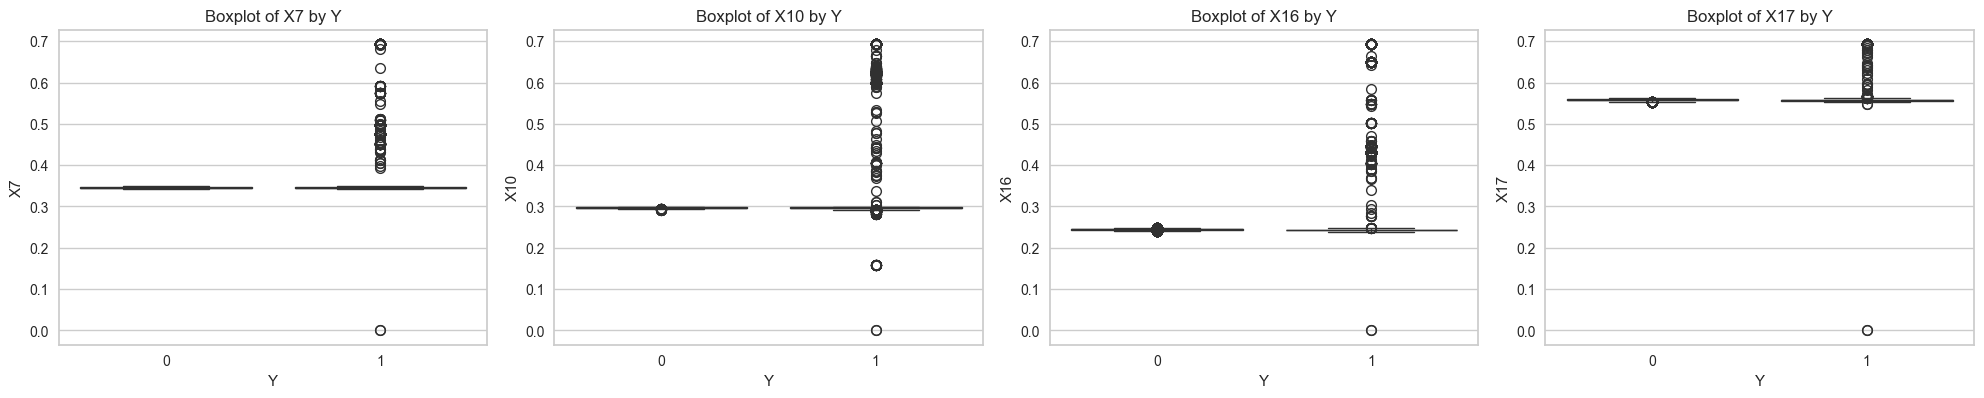

In [86]:
# 사용할 피처들
features = ['X7', 'X10', 'X16', 'X17']

# 박스플롯을 그리기 위한 설정
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x='Y', y=feature, data=data)
    plt.title(f'Boxplot of {feature} by Y')

plt.tight_layout()
plt.show()

ValueError: Could not interpret value `X20` for `y`. An entry with this name does not appear in `data`.

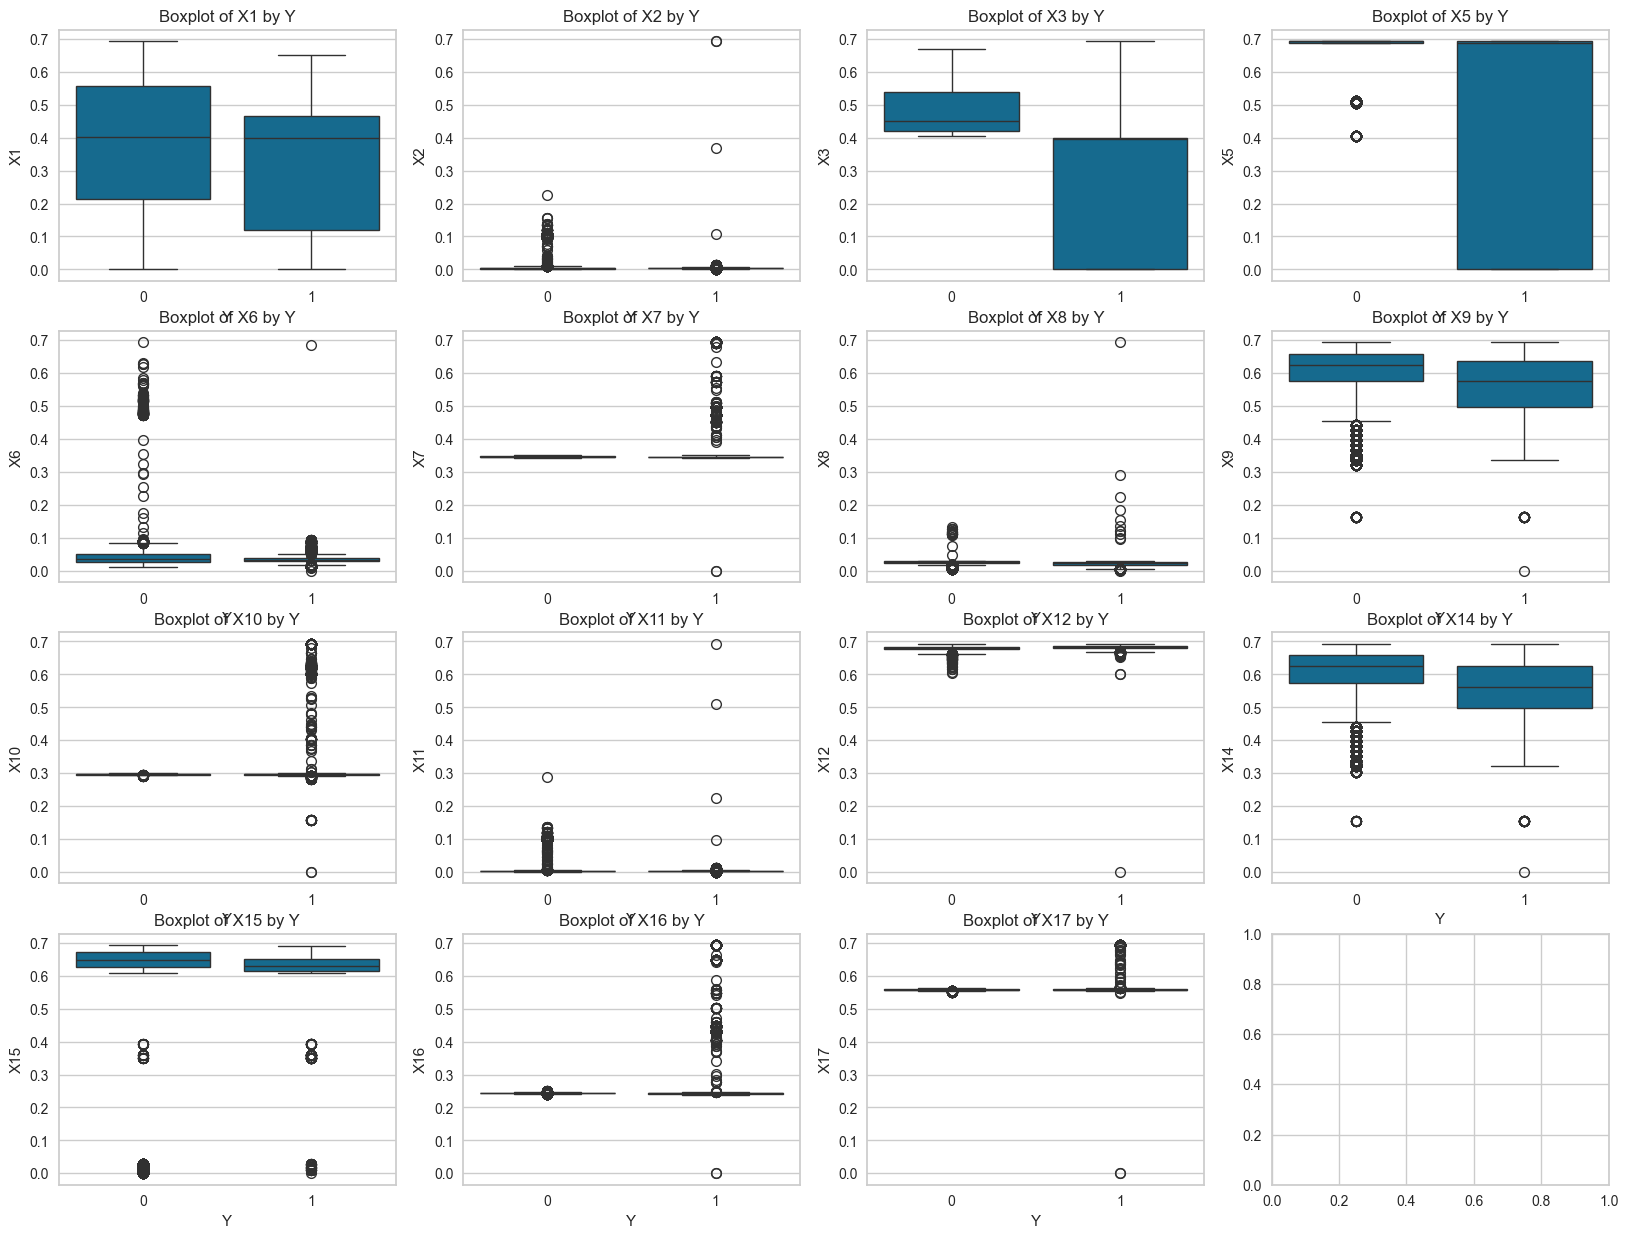

In [87]:
# 사용할 피처들
features = ['X1', 'X2', 'X3', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X14', 'X15', 'X16', 'X17', 'X20']

# 박스플롯을 그리기 위한 설정
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x='Y', y=feature, data=data)
    plt.title(f'Boxplot of {feature} by Y')

plt.tight_layout()
plt.show()

## 최종 개선율

In [ ]:
# Assuming your data is stored in a DataFrame called 'data'
y_counts = data['Y'].value_counts()
y_proportions = data['Y'].value_counts(normalize=True)

print("Counts of 0s and 1s in 'Y':")
print(y_counts)

print("\nProportions of 0s and 1s in 'yY:")
print(y_proportions)

Counts of 0s and 1s in 'Y':
0    470000
1     57000
Name: Y, dtype: int64

Proportions of 0s and 1s in 'yY:
0    0.891841
1    0.108159
Name: Y, dtype: float64


In [ ]:
(48493+1400) / 57000

0.8753157894736842